<a href="https://colab.research.google.com/github/PPP180000/Sklearn-GridSearch-AUC-Scores/blob/master/NN/Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd

In [0]:
from google.colab import files
loan_data= pd.read_csv('/content/loan.csv')
 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


id                       float64
member_id                float64
loan_amnt                  int64
funded_amnt                int64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 145, dtype: object
0           10
1           10
2            6
3           10
4           10
          ... 
2260663     10
2260664      1
2260665     10
2260666    NaN
2260667      3
Name: emp_length, Length: 2260668, dtype: object
0              RENT
1          MORTGAGE
2          MORTGAGE
3          MORTGAGE
4          MORTGAGE
             ...   
2260663    MORTGAGE
2260664    MORTGAGE
2260665         OWN
2260666        RENT
2260667        RENT
Name: home_ownership, Length: 2260668, dtype: object
0          debt_consolidation
1          debt_consolidation
2          debt_consolidation
3          debt_consolidation
4  

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:329: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


[False False False False False False False False  True  True False  True
 False  True  True False  True False  True  True False  True  True  True
 False  True  True False False  True False False  True False False  True
 False  True  True  True False False  True  True  True  True False False
 False  True False  True False False False False False  True False False
 False False  True  True  True False False  True  True  True False False
 False False  True  True  True False False  True  True  True  True False
  True  True  True False False False False  True  True False  True False
  True False False False False  True False False False  True  True  True
  True]


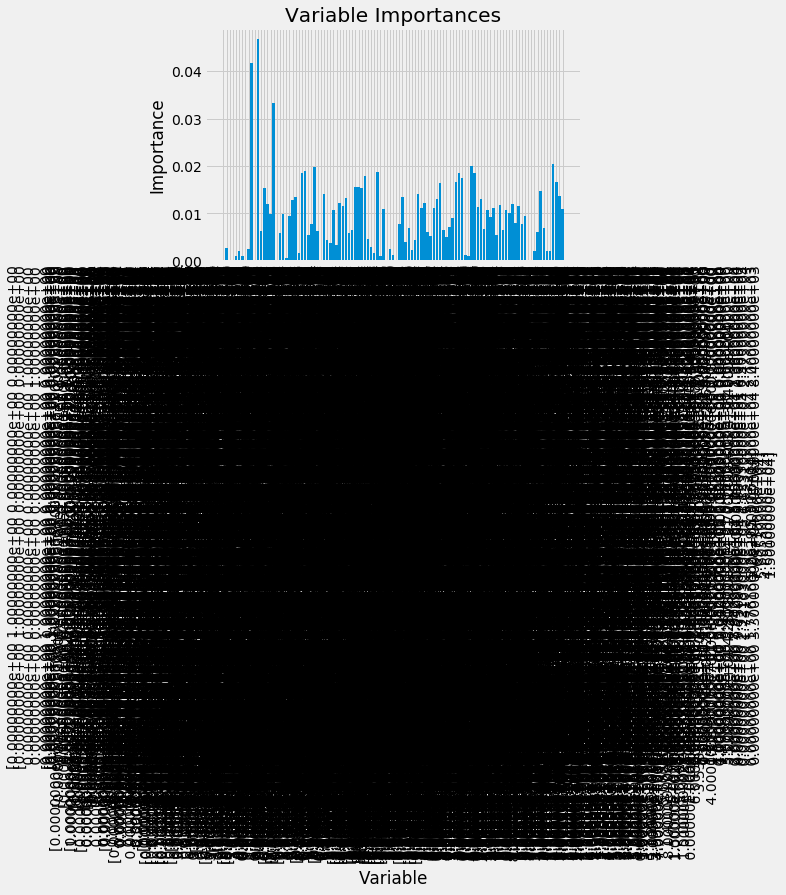

In [0]:
import pandas as pd
import numpy as np
from sklearn import ensemble 
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV, train_test_split



print(loan_data.dtypes) 



loan_data['home_ownership']
loan_data.describe().transpose() #what happened to the other variables?
# do you see any outliers?


# In[121]:


# Show number of missings in each of the above features. There are many ways. I do it this way:
# Deduct number of observations from count column in the describe table.
# To work with describe, let's check its type.
#type(loan_data.describe())


# In[123]:


# for i in loan_data:
#     if loan_data[i].isnull().sum() > 150000:
#         model_data = loan_data.drop(loan_data[i],1)
#         model_data


# In[124]:


# We are going to use sklearn to develop the model. 
# sklearn does not work with character variables; so we need to convert them to numeric. 

temp_data = loan_data.drop(["id",'member_id','url','sub_grade','emp_title','sec_app_open_acc','sec_app_revol_util',
                           'sec_app_open_act_il',  
                            #"sec_app_num_rev_accts ", "sec_app_chargeoff_within_12_mths",
                            #"sec_app_collections_12_mths_ex_med ", 
                            'sec_app_mths_since_last_major_derog','hardship_flag',
                            'hardship_type','hardship_reason','hardship_status','deferral_term','hardship_amount','hardship_start_date',
                            'hardship_end_date','payment_plan_start_date','hardship_length','hardship_dpd','hardship_loan_status',
                            'orig_projected_additional_accrued_interest','hardship_payoff_balance_amount','hardship_last_payment_amount',
                            'disbursement_method','debt_settlement_flag','debt_settlement_flag_date','settlement_status','settlement_date',
                            'settlement_amount','settlement_percentage','settlement_term',
                           'revol_bal_joint','sec_app_earliest_cr_line','sec_app_inq_last_6mths','sec_app_mort_acc',
                           'sec_app_num_rev_accts',"sec_app_chargeoff_within_12_mths",'sec_app_collections_12_mths_ex_med','mths_since_recent_bc_dlq',
                           'desc','mths_since_last_delinq','mths_since_last_record','issue_d','title','zip_code',
                           'addr_state','earliest_cr_line','initial_list_status','last_pymnt_d','next_pymnt_d','last_credit_pull_d',
                           'application_type','verification_status_joint'],1)



temp_data.shape
temp_data['home_ownership']
#temp_data.dtypes
temp_data[:].isnull().sum()

#model_data = temp_data[~ temp_data["emp_length"].isnull()]
temp_data['emp_length'] = temp_data['emp_length'].replace({"1 year": 1,'10+ years' : 10, "2 years": 2,"3 years": 3,                                 
                                                       "4 years": 4,"5 years": 5,"6 years": 6,"7 years": 7,"8 years": 8,
                                                        "9 years": 9, "< 1 year": 1, 'NaN': 0 })

temp_data['emp_length']
#set(temp_data['term'])


# In[133]:


temp_data['term'] = temp_data['term'].replace({' 36 months':36, ' 60 months':60})


# In[134]:


set(temp_data['term'])


# In[135]:


temp_data['grade'] = temp_data['grade'].replace({"A": 100.00,'B' : 80.00, 'C': 70.00, 'D': 60.00, "E": 50.00, "F": 40.00, "G": 30.00})


# In[136]:


temp_data['grade']


# In[ ]:





# In[137]:


#temp_data['home_ownership'] = temp_data['home_ownership'].replace({'ANY': 1, 'MORTGAGE': 2, 'NONE': 0 , 'OTHER':3, 'OWN':4, 'RENT':5})


# In[138]:


temp_data['home_ownership']


# In[ ]:





# In[139]:


set(temp_data['home_ownership'])


# In[140]:


temp_data['verification_status'] = temp_data['verification_status'].replace({'Not Verified':0, 'Source Verified':50, 'Verified':100})


# In[141]:


set(temp_data['verification_status'])


# In[142]:


temp_data['loan_status'] = temp_data['loan_status'].replace({'Charged Off':1,'Current':1,'Default':0,'Does not meet the credit policy. Status:Charged Off':0,
 'Does not meet the credit policy. Status:Fully Paid':0,'Fully Paid':1,'In Grace Period':1,'Late (16-30 days)':1,'Late (31-120 days)':0})


# In[143]:


set(temp_data['loan_status'])


# In[144]:


temp_data['pymnt_plan'] = temp_data['pymnt_plan'].replace({'n':0, 'y':1})


# In[145]:


set(temp_data['pymnt_plan'])


# In[146]:


# temp_data['purpose'] = temp_data['purpose'].replace({'car':1,
#  'credit_card':2,
#  'debt_consolidation':3,
#  'educational':4,
#  'home_improvement':5,
#  'house':6,
#  'major_purchase':7,
#  'medical':8,
#  'moving':9,
#  'other':0,
#  'renewable_energy':10,
#  'small_business':11,
#  'vacation':12,
#  'wedding':13})


# In[147]:


set(temp_data['purpose'])


# In[148]:


list = []
for i in temp_data:
    if temp_data[i].dtypes == object:
        print(temp_data[i])
        #we don't get any objects means removed all the objects and converted some 
        #into float by adding values in the features



temp_data.dtypes


#model_data = temp_data[~ temp_data["mort_acc"].isnull()]


#model_data.drop(["mort_acc"],1,inplace=True)

model_data = temp_data["mort_acc"].isnull().dropna().copy()

print(temp_data["mort_acc"].isnull().sum())
print(model_data.shape)


# model_data = temp_data[~ temp_data["emp_length"].isnull()]
# model_data = temp_data[~ temp_data["dti"].isnull()]
# model_data = temp_data[~ temp_data["delinq_2yrs"].isnull()]
# model_data = temp_data[~ temp_data["inq_last_6mths"].isnull()]
# model_data = temp_data[~ temp_data["open_acc"].isnull()]
# model_data = temp_data[~ temp_data["pub_rec"].isnull()]
# model_data = temp_data[~ temp_data["revol_util"].isnull()]
# model_data = temp_data[~ temp_data["total_acc"].isnull()]
# model_data = temp_data[~ temp_data["mo_sin_old_il_acct"].isnull()]
model_data = temp_data[~ temp_data["mths_since_recent_revol_delinq"].isnull()]




model_data.shape


model_data['avg_cur_bal'].mean()

model_data['emp_length'].fillna(1, inplace = True)
model_data['dti'].fillna(10, inplace = True)
model_data['revol_util'].fillna(60, inplace = True)
model_data['mo_sin_old_il_acct'].fillna(88, inplace = True)
model_data['mo_sin_old_rev_tl_op'].fillna(260, inplace = True)
model_data['mo_sin_rcnt_rev_tl_op'].fillna(10, inplace = True)
model_data['mo_sin_rcnt_tl'].fillna(6, inplace = True)
model_data['mths_since_recent_bc'].fillna(15, inplace = True)
model_data['mths_since_recent_inq'].fillna(7, inplace = True)
model_data['num_accts_ever_120_pd'].fillna(0, inplace = True)
model_data['num_actv_bc_tl'].fillna(6, inplace = True)
model_data['num_actv_rev_tl'].fillna(4, inplace = True)

model_data['num_bc_sats'].fillna(4, inplace = True)
model_data['num_bc_tl'].fillna(7, inplace = True)
model_data['num_il_tl'].fillna(11, inplace = True)
model_data['num_op_rev_tl'].fillna(7, inplace = True)
model_data['num_rev_accts'].fillna(11, inplace = True)
model_data['num_rev_tl_bal_gt_0'].fillna(10, inplace = True)
model_data['num_sats'].fillna(4, inplace = True)
model_data['num_tl_120dpd_2m'].fillna(0, inplace = True)
model_data['num_tl_30dpd'].fillna(0, inplace = True)

model_data['num_tl_90g_dpd_24m'].fillna(0, inplace = True)
model_data['num_tl_op_past_12m'].fillna(3, inplace = True)
model_data['pct_tl_nvr_dlq'].fillna(66, inplace = True)
model_data['percent_bc_gt_75'].fillna(0, inplace = True)
model_data['tot_hi_cred_lim'].fillna(186287.010, inplace = True)
model_data['total_il_high_credit_limit'].fillna(45241, inplace = True)
model_data['policy_code'].fillna(1, inplace = True)
model_data['dti_joint'].fillna(0, inplace = True)

model_data['acc_now_delinq'].fillna(0, inplace = True)
model_data['tot_cur_bal'].fillna(150452, inplace = True)
model_data['open_acc_6m'].fillna(1, inplace = True)
model_data['open_act_il'].fillna(2, inplace = True)
model_data['open_il_12m'].fillna(1, inplace = True)
model_data['open_il_24m'].fillna(1, inplace = True)
model_data['mths_since_rcnt_il'].fillna(21, inplace = True)

model_data['total_bal_il'].fillna(36937, inplace = True)
model_data['il_util'].fillna(69, inplace = True)
model_data['open_rv_12m'].fillna(1, inplace = True)
model_data['open_rv_24m'].fillna(2, inplace = True)
model_data['max_bal_bc'].fillna(5250, inplace = True)
model_data['all_util'].fillna(57, inplace = True)
model_data['total_rev_hi_lim'].fillna(31189, inplace = True)
model_data['inq_fi'].fillna(1, inplace = True)
model_data['total_cu_tl'].fillna(1, inplace = True)

model_data['inq_last_12m'].fillna(2, inplace = True)
model_data['acc_open_past_24mths'].fillna(4.66, inplace = True)
model_data['bc_open_to_buy'].fillna(9488, inplace = True)
model_data['bc_util'].fillna(58, inplace = True)
model_data['chargeoff_within_12_mths'].fillna(0, inplace = True)

model_data['mths_since_last_major_derog'].fillna(23, inplace = True)
model_data['annual_inc_joint'].fillna(6013, inplace = True)
model_data['tot_coll_amt'].fillna(6013, inplace = True)
model_data['avg_cur_bal'].fillna(14203, inplace = True)



model_data['avg_cur_bal'].isnull().sum()


model_data.columns[56]

#model_data.dropna(subset=['mo_sin_rcnt_tl'])

model_data['chargeoff_within_12_mths'].isnull().sum()


# Sklearn does not work with missing values; 
# so we need to impute missing values.
# first calculate number of missing

(model_data.shape[0] - model_data.describe().transpose()["count"]).values
    


# In[163]:


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
import sys
le = LabelEncoder()
model_data['home_ownership'] = le.fit_transform(model_data['home_ownership'])
# model_data = le.fit_transform(model_data['loan_status'])
# model_data = le.fit_transform(model_data['purpose'])


#model_data.iloc[:,8].shape


# X_data = model_data.drop(['home_ownership'],1)
# X_data.shape

#ohe = OneHotEncoder(categorical_features=model_data['home_ownership'])
#ohe
ct = ColumnTransformer(transformers=[('home_ownership',OneHotEncoder(), [8,11,13])], remainder='passthrough')
model_data = ct.fit_transform(model_data)

model_data


model_data[:].shape
# Now we are ready to run gradient boosting.
# Define Y and X
Y = model_data[:,8]
X = np.delete(model_data,[8],1)
X.shape
# # run a simple model
# params = {'n_estimators': 3,'max_leaf_nodes':6,'learning_rate': 0.1, 'random_state':1}
# model = ensemble.GradientBoostingClassifier(**params)
# model.fit(X, Y)



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_train, y_train)
# Extract the small tree
tree_small = sel.estimator_[96]
tree_small


# Get numerical feature importances
importances = tree_small.feature_importances_

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

#feature_importances 
importances

get_ipython().run_line_magic('matplotlib', 'inline')
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = range(len(importances))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X_train, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

print(sel.get_support())



In [0]:

# [False False False False False False  True  True  True  True  True  True
#  False  True False  True False False False False False False False False
#  False False False False False False False False False False False False
#  False False False False False False False False False False False False
#  False False False False False False False False False False False False
#  False False False False False False False False False False False False
#  False False False False False False False False False False False False
#  False False False False False False False False False False False False
#  False False False False False False False False False False]
# [ True False False  True False False False  True  True  True  True  True
#   True False False False False False False  True  True False  True False
#  False  True]
#removing unnecessary features
Y = model_data[:,8]
X = np.delete(model_data,[0,1,2,3,4,5,6,7,8,11,13,15,16,18,19,20,21,22,23,24,25,28,29,31,32,34,35,36,37,40,41,42,45,47,48,49,51,52,53,54,55,56,57,
                         59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,78,79,82,83,84,85,86,88,89,90,91,92,93,94,95,96,98,99,100,101,103,104,105,108,109],1)


X.shape
Y.shape

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_train, y_train)
print(sel.get_support())
tree_small = sel.estimator_[27]


# In[190]:


# Get numerical feature importances
importances = tree_small.feature_importances_

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

feature_importances




[False False False False False  True  True  True  True  True False  True
  True  True  True False  True  True False  True  True False False False
  True  True]


[(array([0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 1.757000e+01, 8.806100e+02, 9.500000e+04,
         5.040000e+00, 1.241600e+04, 3.880000e+01, 4.089913e+04,
         4.089913e+04, 5.899130e+03, 3.128075e+04, 2.594110e+05,
         2.358300e+04, 4.723000e+03, 6.570000e+01, 8.800000e+01,
         1.030000e+02, 3.700000e+01, 1.100000e+01, 9.170000e+01,
         3.096510e+05, 1.278100e+04]), 0.06),
 (array([0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.5050e+01, 2.0814e+02, 2.6000e+04, 4.8340e+01, 4.7600e+03,
         3.6100e+01, 2.1034e+03, 2.1034e+03, 2.1571e+02, 2.0814e+02,
         1.0897e+04, 9.0800e+02, 2.4200e+02, 9.5200e+01, 1.4200e+02,
         3.0500e+02, 5.6000e+01, 1.1000e+01, 9.1300e+01, 3.5837e+04,
         1.0897e+04]), 0.05),
 (array([0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.19900000e+01, 4.15120000e+02, 1.65000000e+05,
         1.90800000e+01, 4.47470000e+04, 5.

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=21, max_leaf_nodes=21,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


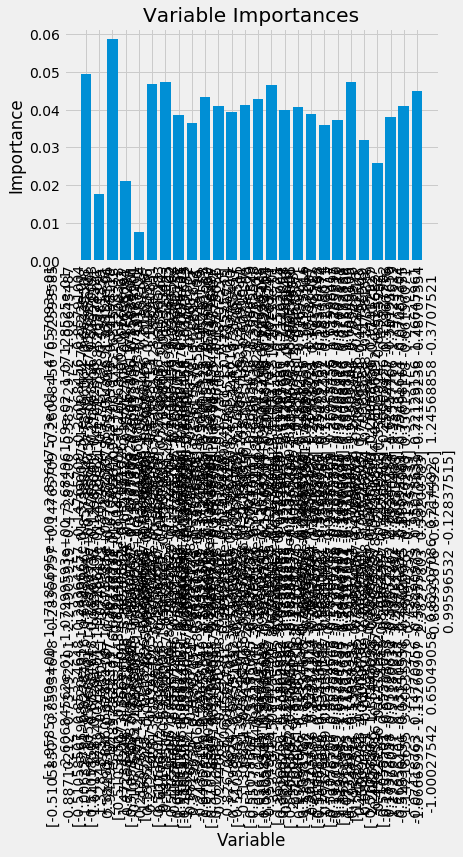

In [0]:
get_ipython().run_line_magic('matplotlib', 'inline')
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = range(len(importances))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X_train, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# run a simple model
params = {'n_estimators': 20,'max_leaf_nodes':21,'learning_rate': 0.1, 'random_state':1, 'max_features': 21}
classifier = ensemble.GradientBoostingClassifier(**params)
classifier.fit(X_train, y_train)




In [0]:
# calculate AUC
from sklearn.metrics import roc_auc_score
from sklearn import ensemble 
from sklearn.externals import joblib
roc_auc_score(Y, classifier.predict(X))      
# StandardScaler() : Scaling is used to give same weights to each variables so 
# that in our optimization problem will give us the best value instead of giving different values each time

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_test

array([[-0.50770441,  0.85092708, -0.28297225, ...,  0.06515009,
         2.39497448, -0.60953925],
       [-0.50770441,  0.85092708, -0.28297225, ..., -1.63965744,
        -0.71990932, -0.38429301],
       [-0.50770441,  0.85092708, -0.28297225, ..., -0.14916857,
        -0.78427257, -0.69519828],
       ...,
       [ 1.96965003, -1.17518882, -0.28297225, ..., -2.99376171,
        -0.54120974,  0.71715929],
       [-0.50770441,  0.85092708, -0.28297225, ...,  0.10411712,
         1.51337967,  2.26928703],
       [-0.50770441,  0.85092708, -0.28297225, ...,  0.95165   ,
        -0.72773305, -0.37864203]])

In [0]:
# In[197]:

import tensorflow as tf
from tensorflow import keras
# Example of Dropout on the Sonar Dataset: Visible Layer
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


def build_classifier():  
    classifier = Sequential()
    classifier.add(Dense(units=26, kernel_initializer='glorot_uniform', activation='relu'))
    
    classifier.add(Dense(units=25, kernel_initializer='glorot_uniform', activation='relu'))
    classifier.add(Dense(units=25, kernel_initializer='glorot_uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    sgd = SGD(lr=20, momentum=0.2)
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier
  
classifier = KerasClassifier(build_fn=build_classifier, batch_size=20, nb_epoch=3)
accuracies_train = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, n_jobs=1)

print('Accuracy Mean:' , accuracies_train.mean())
print('Accuracy STD:', accuracies_train.std())

Using TensorFlow backend.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





55527/55527 [==============================] - 2s 28us/step
Epoch 1/1
55527/55527 [==============================] - 2s 29us/step
Epoch 1/1
55527/55527 [==============================] - 2s 31us/step
Epoch 1/1
55527/55527 [==============================] - 2s 32us/step
Epoch 1/1
55527/55527 [==============================] - 2s 34us/step
Epoch 1/1
55527/55527 [==============================] - 2s 35us/step
Epoch 1/1
55527/55527 [==============================] - 2s 38us/step
Epoch 1/1
55527/55527 [==============================] - 2s 40us/step
Epoch 1/1
55527/55527 [==============================] - 2s 39us/step
Epoch 1/1
55526/55526 [==============================] - 2s 42us/step


NameError: ignored

In [0]:
#@title Default title text
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


def build_classifier():  
    classifier = Sequential()
    classifier.add(Dense(units=26, kernel_initializer='glorot_uniform', activation='relu'))
    
    classifier.add(Dense(units=25, kernel_initializer='glorot_uniform', activation='relu'))
    classifier.add(Dense(units=25, kernel_initializer='glorot_uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    sgd = SGD(lr=20, momentum=0.2)
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier
  
classifier = KerasClassifier(build_fn=build_classifier, batch_size=20, nb_epoch=3)
accuracies_test = cross_val_score(estimator=classifier, X=X_test, y=y_test, cv=10, n_jobs=1)

print('Accuracy Mean:' , accuracies_test.mean())
print('Accuracy STD:', accuracies_test.std())

Epoch 1/1
18509/18509 [==============================] - 1s 59us/step
Epoch 1/1
18509/18509 [==============================] - 1s 71us/step
Epoch 1/1
18509/18509 [==============================] - 1s 70us/step
Epoch 1/1
18509/18509 [==============================] - 1s 74us/step
Epoch 1/1
18509/18509 [==============================] - 1s 77us/step
Epoch 1/1
18509/18509 [==============================] - 2s 87us/step
Epoch 1/1
18509/18509 [==============================] - 2s 91us/step
Epoch 1/1
18509/18509 [==============================] - 2s 88us/step
Epoch 1/1
18509/18509 [==============================] - 2s 92us/step
Epoch 1/1
18509/18509 [==============================] - 2s 95us/step
Accuracy Mean: 0.9898589851694057
Accuracy STD: 0.0008151036467933509


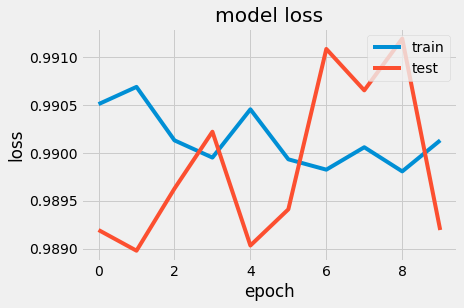

In [0]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(accuracies_train[:])
plt.plot(accuracies_test[:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
Xnew, _ = make_regression(n_samples=3, noise=0.2, n_features=2, random_state=1)
Xnew = scalar.transform(Xnew)
# make a prediction
ynew = model.predict_classes(Xnew)

NameError: ignored

In [0]:
#Print Area Under Curve
predictions_NN_prob = accuracies_train.predict(X_test)
predictions_NN_prob = predictions_NN_prob[:,0]

false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

AttributeError: ignored